In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

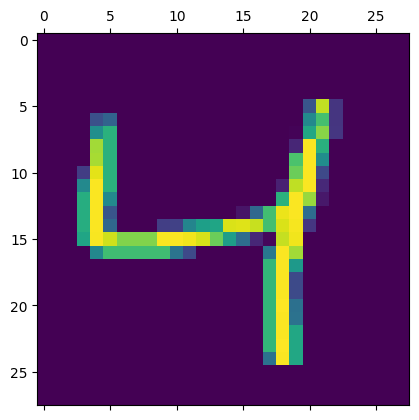

In [6]:
plt.matshow(x_train[2])

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [9]:
x_train_flattened.shape

(60000, 784)

In [10]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

tb_call_back = tf.keras.callbacks.TensorBoard(log_dir = "logs/", histogram_freq = 1)

model.fit(x_train_flattened,y_train, epochs = 5, callbacks = [tb_call_back])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4705 - accuracy: 0.8755
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3048 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2833 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2731 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2666 - accuracy: 0.9255


In [11]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2656 - accuracy: 0.9255


[0.26555928587913513, 0.9254999756813049]

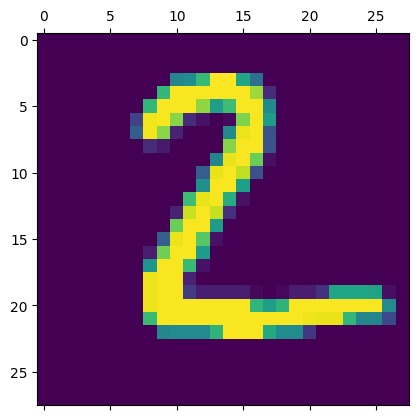

In [12]:
plt.matshow(x_test[1])

In [13]:
y_predict= model.predict(x_test_flattened)
y_predict[1]

313/313 [==============================] - 1s 2ms/step


array([3.8214079e-01, 1.5293406e-03, 9.9923062e-01, 4.3106481e-01,
       4.2812182e-10, 7.7010524e-01, 8.2077706e-01, 7.9635127e-13,
       9.1750234e-02, 1.7222371e-09], dtype=float32)

In [14]:
np.argmax(y_predict[1])

2

In [15]:
y_predict_label = [np.argmax(i) for i in y_predict]
y_predict_label[:4]

[7, 2, 1, 0]

In [16]:
cm = tf.math.confusion_matrix(labels = y_test,predictions = y_predict_label)


Text(95.72222222222221, 0.5, 'Truth')

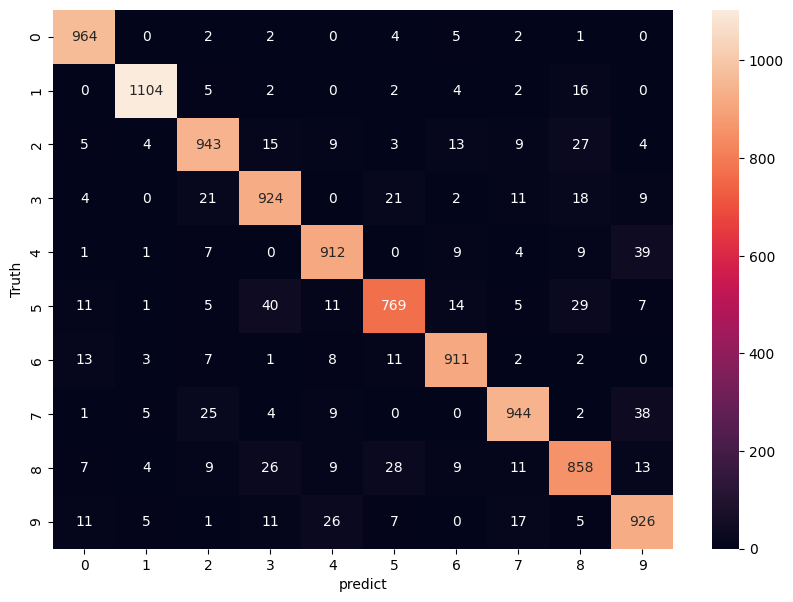

In [17]:
import seaborn as sns
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('predict')
plt.ylabel('Truth')